In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")

In [3]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df['arrival_date_year'] += 8

In [6]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'].str.strip(), format='%Y-%m-%d')
df['reservation_status_date'] = df['reservation_status_date'] + pd.DateOffset(years=8)

In [7]:
df.drop(df[(df['arrival_date_year'] == 2025) & (df['arrival_date_month'].isin(['March', 'April', 'May', 'June', 'July', 'August']))].index, inplace=True)

In [8]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             449
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12350
company                           81324


In [9]:
df.drop(['agent', 'company'], axis = 1, inplace = True)

In [10]:
df['children'] = df['children'].fillna(0)

In [11]:
df = df.dropna(subset=['country'])

In [12]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2023,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2023-07-01
1,Resort Hotel,0,737,2023,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2023-07-01
2,Resort Hotel,0,7,2023,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2023-07-02
3,Resort Hotel,0,13,2023,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2023-07-02
4,Resort Hotel,0,14,2023,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2023-07-03


In [13]:
df['revenue'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])

In [14]:
df.revenue.describe()

count    86112.000000
mean       319.237604
std        300.709090
min          0.000000
25%        128.000000
50%        240.000000
75%        395.000000
max       6148.000000
Name: revenue, dtype: float64

In [15]:
df[(df['is_canceled'] == 1) & (df['revenue'] != 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,revenue
8,Resort Hotel,1,85,2023,July,27,1,0,3,2,...,0,No Deposit,0,Transient,82.0,0,1,Canceled,2023-05-06,246.0
9,Resort Hotel,1,75,2023,July,27,1,0,3,2,...,0,No Deposit,0,Transient,105.5,0,0,Canceled,2023-04-22,316.5
10,Resort Hotel,1,23,2023,July,27,1,0,4,2,...,0,No Deposit,0,Transient,123.0,0,0,Canceled,2023-06-23,492.0
27,Resort Hotel,1,60,2023,July,27,1,2,5,2,...,0,No Deposit,0,Transient,107.0,0,2,Canceled,2023-05-11,749.0
32,Resort Hotel,1,96,2023,July,27,1,2,8,2,...,0,No Deposit,0,Transient,108.3,0,2,Canceled,2023-05-29,1083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94308,City Hotel,1,3,2024,September,38,12,1,2,1,...,0,No Deposit,0,Transient,67.0,0,1,No-Show,2024-09-12,201.0
95891,City Hotel,1,12,2024,October,42,12,0,2,1,...,0,No Deposit,0,Transient,65.0,0,1,No-Show,2024-10-12,130.0
97968,City Hotel,1,0,2024,October,42,10,1,2,1,...,0,No Deposit,0,Transient,153.0,0,0,No-Show,2024-10-10,459.0
98809,City Hotel,1,0,2024,December,51,12,1,0,2,...,0,No Deposit,0,Transient,77.0,0,2,Canceled,2024-12-12,77.0


In [16]:
df.loc[df['is_canceled'] == 1, 'revenue'] = 0

In [17]:
df.arrival_date_day_of_month.describe()

count    86112.000000
mean        15.824101
std          8.738133
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date_day_of_month, dtype: float64

In [18]:
df.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [19]:
df['check_in_date'] = pd.to_datetime(
    df.arrival_date_day_of_month.fillna(1).astype(int).astype(str) + '-' +
    df.arrival_date_month.fillna('January').astype(str) + '-' + 
    df.arrival_date_year.fillna(2000).astype(int).astype(str),
    format='%d-%B-%Y'
)

In [20]:
df['month'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'], format='%Y-%B')

result = df.sort_values(by='check_in_date').groupby('month')['revenue'].sum().reset_index()

In [21]:
result.head()

,month,revenue
0,2023-07-01,752888.33
1,2023-08-01,1119561.28
2,2023-09-01,1049156.95
3,2023-10-01,782577.58
4,2023-11-01,345585.49


In [22]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
!mkdir /kaggle/working/plots

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


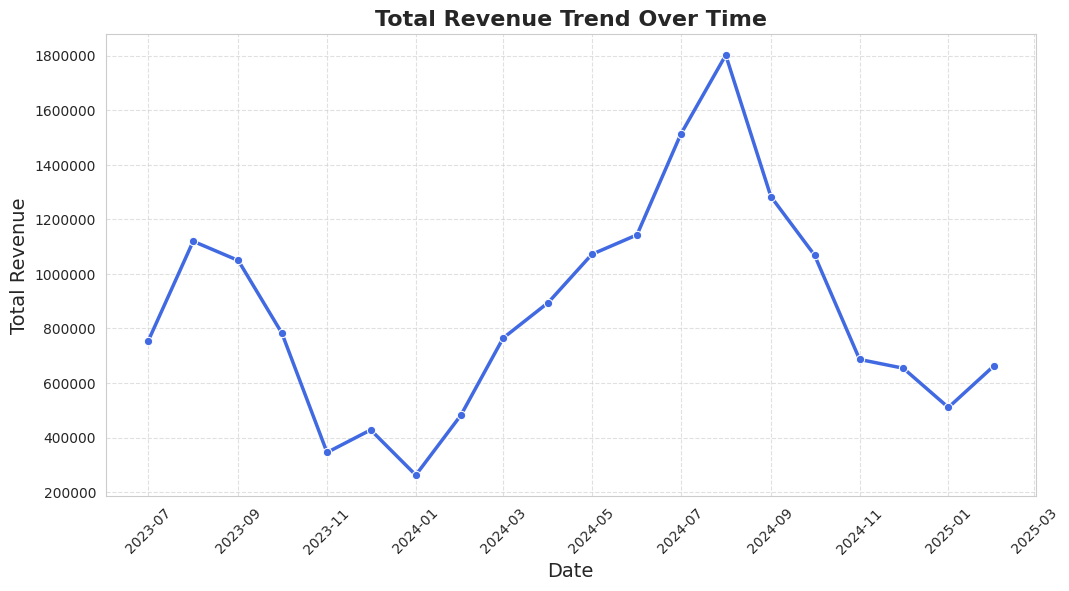

In [25]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.lineplot(data=result, x='month', y='revenue', marker='o', linewidth=2.5, color='royalblue')

plt.title('Total Revenue Trend Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("/kaggle/working/plots/total_revenue_trend.png")
plt.show()

In [26]:
cancellation_data = df.groupby('month').agg(
    total_bookings=('is_canceled', 'count'),
    total_cancellations=('is_canceled', 'sum')
).reset_index()

cancellation_data['cancellation_rate'] = (cancellation_data['total_cancellations'] / cancellation_data['total_bookings']) * 100

In [27]:
cancellation_data

,month,total_bookings,total_cancellations,cancellation_rate
0,2023-07-01,2763,1259,45.566413
1,2023-08-01,3877,1598,41.217436
2,2023-09-01,5084,2078,40.873328
3,2023-10-01,4919,1716,34.885139
4,2023-11-01,2320,486,20.948276
5,2023-12-01,2900,973,33.551724
6,2024-01-01,2215,557,25.146727
7,2024-02-01,3857,1336,34.638320
8,2024-03-01,4788,1476,30.827068
9,2024-04-01,5404,2059,38.101406


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


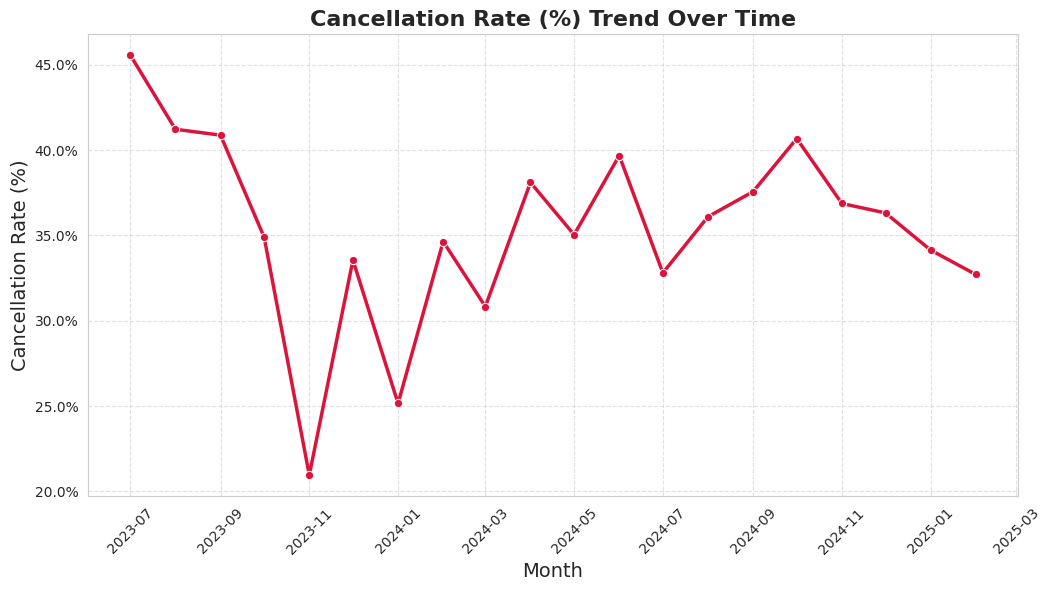

In [28]:
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.lineplot(data=cancellation_data, x='month', y='cancellation_rate', marker='o', linewidth=2.5, color='crimson')

plt.title('Cancellation Rate (%) Trend Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=14)
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter())

plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("/kaggle/working/plots/cancellation_rate_trend.png")
plt.show()


In [29]:
country_data = df.groupby('country').size().reset_index(name='total_bookings')

In [30]:
import plotly.express as px

fig = px.choropleth(
    country_data,
    locations='country',
    locationmode='ISO-3',
    color='total_bookings',
    color_continuous_scale='Reds',
    title='Geographical Distribution of Bookings'
)

fig.write_html("/kaggle/working/plots/geo_dist.html")
fig.show(renderer='colab')


In [31]:
df.lead_time.describe()

count    86112.000000
mean        97.412614
std        105.703544
min          0.000000
25%         15.000000
50%         59.000000
75%        148.000000
max        737.000000
Name: lead_time, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



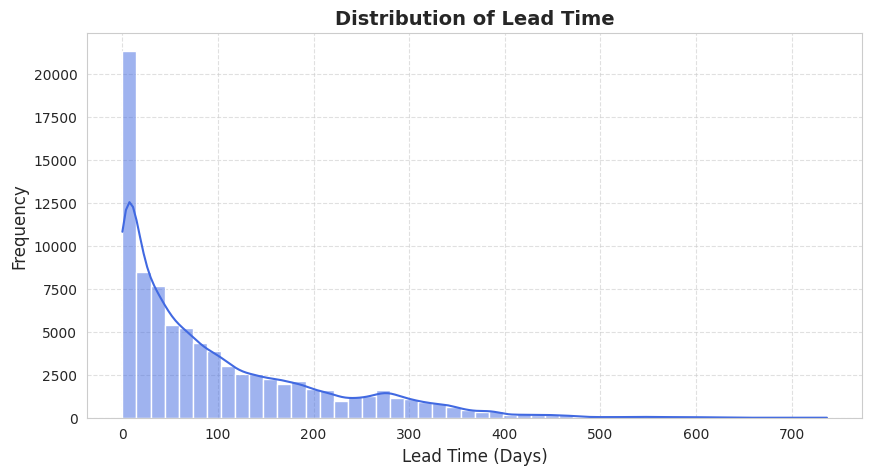

In [32]:
plt.figure(figsize=(10, 5))
sns.histplot(df['lead_time'], bins=50, kde=True, color='royalblue')

plt.title('Distribution of Lead Time', fontsize=14, fontweight='bold')
plt.xlabel('Lead Time (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("/kaggle/working/plots/distribution_lead_time.png")
plt.show()

<ipython-input-33-f1ea994d8893>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



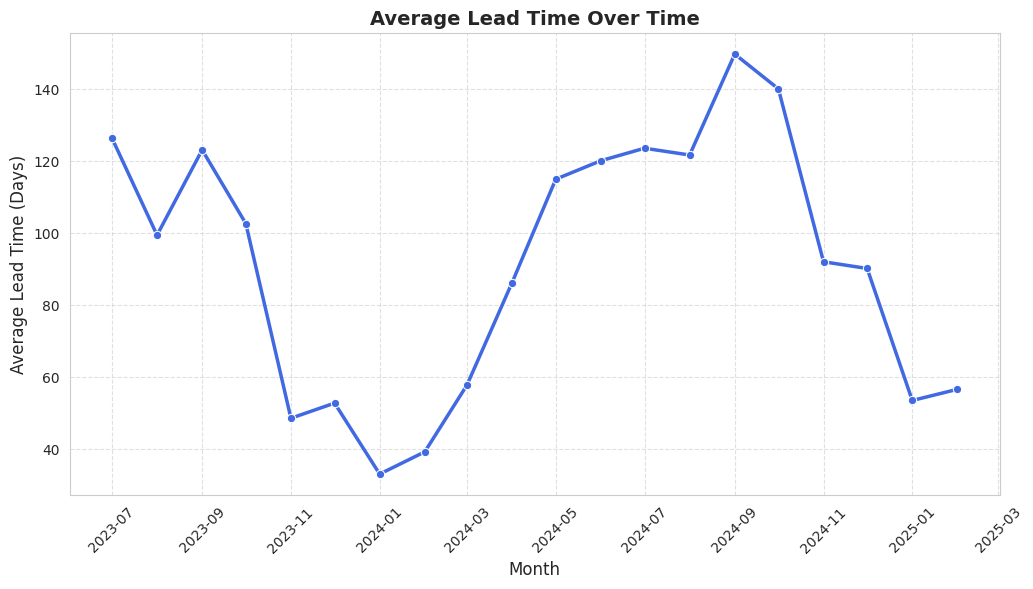

In [33]:
df['month'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'])
lead_time_trend = df.groupby('month')['lead_time'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=lead_time_trend, x='month', y='lead_time', marker='o', linewidth=2.5, color='royalblue')

plt.title('Average Lead Time Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Lead Time (Days)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("/kaggle/working/plots/average_lead_time_trend.png")

plt.show()


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86112 entries, 0 to 107072
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86112 non-null  object        
 1   is_canceled                     86112 non-null  int64         
 2   lead_time                       86112 non-null  int64         
 3   arrival_date_year               86112 non-null  int64         
 4   arrival_date_month              86112 non-null  object        
 5   arrival_date_week_number        86112 non-null  int64         
 6   arrival_date_day_of_month       86112 non-null  int64         
 7   stays_in_weekend_nights         86112 non-null  int64         
 8   stays_in_week_nights            86112 non-null  int64         
 9   adults                          86112 non-null  int64         
 10  children                        86112 non-null  float64       
 11  babies

In [35]:
df['children'] = df['children'].astype(int)

In [36]:
df['distribution_channel']

0            Direct
1            Direct
2            Direct
3         Corporate
4             TA/TO
            ...    
106962        TA/TO
107001        TA/TO
107008        TA/TO
107026        TA/TO
107072        TA/TO
Name: distribution_channel, Length: 86112, dtype: object

In [37]:
df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number', 'customer_type', 'required_car_parking_spaces', 'meal', 'market_segment', 'distribution_channel', 'previous_cancellations', 'previous_bookings_not_canceled', 'deposit_type'], axis = 1, inplace = True)

In [38]:
df.to_csv("/kaggle/working/hotel_data.csv")